In [1]:
pip install -q keras-nlp

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from tensorflow import keras
import keras_nlp
import matplotlib.pyplot as plt
import os
from PIL import Image, ImageFile, UnidentifiedImageError

2025-04-19 08:36:00.341128: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745051760.542099      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745051760.596279      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df = pd.read_csv('/kaggle/input/memotion-dataset-7k/memotion_dataset_7k/labels.csv')
img_folder = '/kaggle/input/memotion-dataset-7k/memotion_dataset_7k/train-images'
target_shape = (224, 224)

# df['overall_sentiment'] = df['overall_sentiment'].replace({'negative': 0,'very_negative': 0,'neutral': 1,'positive': 2,'very_positive': 2})
df['humour'] = df['humour'].replace({'not_funny': 0, 'funny': 1, 'very_funny': 1, 'hilarious' : 1})
df['sarcasm'] = df['sarcasm'].replace({'not_sarcastic': 0, 'twisted_meaning': 1, 'general' : 1, 'little_sarcastic' : 1, 'very_sarcastic' : 1, 'very_twisted' : 1})
df['offensive'] = df['offensive'].replace({'not_offensive': 0, 'offensive': 1, 'slight' : 1, 'very_offensive' : 1, 'hateful_offensive': 1})
df['motivational'] = df['motivational'].replace({'not_motivational': 0, 'motivational': 1})

for index, row in df.iterrows():
    if pd.isna(row['text_corrected']):
        df.at[index, 'text_corrected'] = '.'

/tmp/ipykernel_31/2714204667.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['humour'] = df['humour'].replace({'not_funny': 0, 'funny': 1, 'very_funny': 1, 'hilarious' : 1})
/tmp/ipykernel_31/2714204667.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sarcasm'] = df['sarcasm'].replace({'not_sarcastic': 0, 'twisted_meaning': 1, 'general' : 1, 'little_sarcastic' : 1, 'very_sarcastic' : 1, 'very_twisted' : 1})
/tmp/ipykernel_31/2714204667.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be r

In [ ]:
# grouped = df.groupby('overall_sentiment')
# min_size = grouped.size().min()
# min_size

In [ ]:
# df = grouped.apply(lambda x: x.sample(min_size)).reset_index(drop=True)

In [3]:
#X_train_txt
X_train_txt = df['text_corrected']
X_train_txt = X_train_txt.tolist()
X_train_txt = [s.replace('\n', ' ') for s in X_train_txt]

In [4]:
ImageFile.LOAD_TRUNCATED_IMAGES = True
images = []
#X_train_image
for index,row in df.iterrows():
    img_path = os.path.join(img_folder, str(row['image_name']))
    image = Image.open(img_path).convert('L')
    image = image.convert('RGB')    
    image = image.resize(target_shape)
    image_array = np.array(image)
    images.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [5]:
X_train_img = np.array(images)

In [6]:
len(X_train_img)

6992

In [7]:
Y_train = pd.concat([df['humour'], df['sarcasm'], df['offensive'], df['motivational']], axis=1)
print(Y_train.value_counts())
Y_train = np.array(Y_train, dtype=np.int32)

humour  sarcasm  offensive  motivational
1       1        1          0               1605
                            1               1593
                 0          0               1074
        0        0          0                571
0       1        1          0                441
        0        0          0                402
        1        1          1                277
                 0          0                198
1       1        0          1                158
        0        1          0                155
0       0        0          1                110
        1        0          1                102
1       0        0          1                 98
                 1          1                 87
0       0        1          0                 79
                            1                 42
Name: count, dtype: int64


In [8]:
len(X_train_txt)

6992

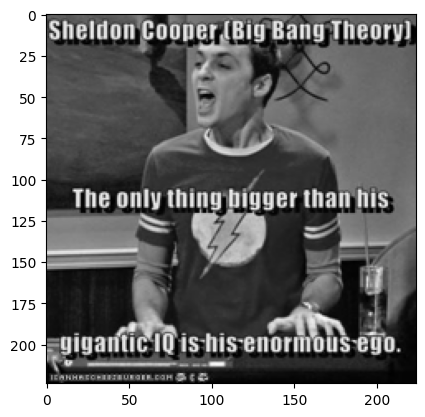

In [9]:
plt.imshow(X_train_img[500])

In [10]:
X_train_txt[500]

'Sheldon Cooper [Big Bang Theory] The only thing bigger than his gigantic IQ is his enormous ego. ICANHASCHEEZBURGER.COM'

In [11]:
len(Y_train)

6992

In [12]:
from transformers import BlipProcessor, BlipForConditionalGeneration
import torch

# Load model and processor
device = "cuda" if torch.cuda.is_available() else "cpu"
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
blip = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large").to(device)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

In [13]:
def get_caption(image):
    inputs = processor(images=image, return_tensors="pt").to(device)
    out = blip.generate(**inputs)
    caption = processor.decode(out[0], skip_special_tokens=True)
    return caption

In [14]:
train_cap = [get_caption(image) for image in images]

In [22]:
train_cap[500]

'a black and white photo of a man in a shirt with a microphone'

In [16]:
df_cc=pd.DataFrame(train_cap, columns=["captions"])
df_cc.to_csv("/kaggle/working/train_captions.csv",index=False)

In [17]:
df_test = pd.read_csv('/kaggle/input/memotion-dataset-7k/memotion_dataset_7k/test-memotion/test_data_memotion.csv')
test_img_folder = '/kaggle/input/memotion-dataset-7k/memotion_dataset_7k/test-memotion/images'

for index, row in df_test.iterrows():
    if pd.isna(row['corrected_text']):
        df_test.at[index, 'corrected_text'] = '.'

In [18]:
test_images = []
valid_rows = []  

for index, row in df_test.iterrows():
    img_path = os.path.join(test_img_folder, str(row['Image_name']))
    try:
        image = Image.open(img_path).convert('L')
        image = image.convert('RGB')
        image = image.resize(target_shape)
        image_array = np.array(image)
        test_images.append(image_array)
        valid_rows.append(row)
    except (UnidentifiedImageError, Exception) as e:
        print(f"Skipping {row['Image_name']}")

Skipping friends_friends-memes-solving-problems.jpg
Skipping tech_Tech-Confusion-Meme-1.jpg
Skipping got_forget-winter-ramadan-is-coming-700x.jpg
Skipping jim_jim-carrey-not-a-known-giverof-fucks-always-gets-me-22570432.png
Skipping hitler_was-adolf-hitler-a-nazi-possible-proof-that-he-was-28559605.png
Skipping x_men_3-Caitlyn-Jenner-is-my-favorite-X-men-funny-meme.jpg
Skipping gene_109im-going-to-tell-you-what-my-religion-is-do-4991864.png
Skipping stevejobs_hey-bill-gates-do-me-a-favor-get-steve-jobs-1832305.png
Skipping jim_happy-birthday-old-2290.png
Skipping chandler_Chandler-Bing-cover-photo.jpg
Skipping seal_parents-want-towatch-that-show-that-everyonestalking-about-with-you-33857100.png
Skipping kim_27-kim-jong-un-meme.png
Skipping lor_funny-Lord-of-the-Rings-meme-tv-film.jpg
Skipping titanic_11-when-jack-dies-in-Titanic-funny-naughty-meme.jpg
Skipping chuck_chuck-norris-meme-8.jpg
Skipping kim_obama-trump-kim-jong-un-never-underestimate-the-power-of-stupid-12688314.png
Skippin

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Skipping giorgio_66-to-create-something-exceptional-your-mindset-must-be-relentlessly-11100024.png
Skipping chuck_chuck-norris-meme-16.jpg
Skipping friends_bm-if-your-friends-didnt-wish-you-happy-friendship-day-26869789.png
Skipping putin_putin-trump-fake-news.jpg
Skipping friends_cousin-day-best-friends-memes-TAG-YOUR-COUSIN-WITH-WHOM-ALL-OF-YOUR-SECRETS-ARE-SAFE.png
Skipping country_club-giggles-memes-that-are-sweeping-the-country-13191.jpg
Skipping mrbri_83Bad-Luck-Brian-meme-collection-1mut.com-17.jpg
Skipping seal_meet-this-happy-little-seal-40940964.png
Skipping country_cross-country-is-a-real-sport.jpg
Skipping titanic_Top-Funniest-Titanic-Memes-8-1024x768.jpg
Skipping nemo_you-have-why-did-you-to-find-nemo-say-that-11392674.png
Skipping country_club-giggles-memes-that-are-sweeping-the-country-13196.jpg
Skipping putin_was-it-voldemort-putin-a-love-take-of-russia-that-19073766.png
Skipping pepe_IMG_4861.JPG
Skipping hitler_18-at-least-Hitler-could-use-an-oven-funny-Ramsay-meme.pn

In [19]:
X_test_img = np.array(test_images)

In [20]:
len(X_test_img)

845

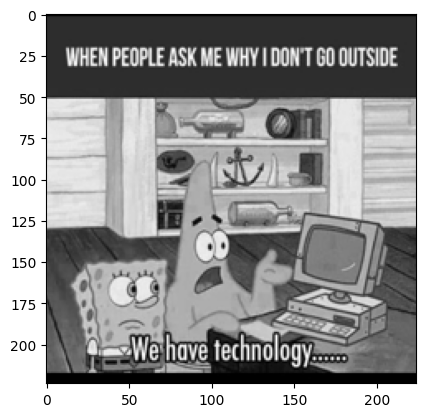

In [21]:
plt.imshow(X_test_img[600])

In [23]:
df_test = pd.DataFrame(valid_rows)

In [24]:
#X_test_txt
X_test_txt = df_test['corrected_text']
X_test_txt = X_test_txt.tolist()
X_test_txt = [s.replace('\n', ' ') for s in X_test_txt]

In [25]:
Y_test = pd.concat([df_test['humour'], df_test['sarcasm'], df_test['offensive'], df_test['motivational']], axis=1)
print(Y_test.value_counts())
Y_test = np.array(Y_test, dtype=np.int32)

humour  sarcasm  offensive  motivational
1       1        1          1               212
                            0               194
                 0          0               127
        0        0          0                61
0       1        1          0                51
        0        0          0                42
1       1        0          1                27
0       1        1          1                26
                 0          0                20
1       0        1          0                17
0       0        1          0                17
1       0        1          1                15
0       0        0          1                13
1       0        0          1                10
0       1        0          1                 9
        0        1          1                 4
Name: count, dtype: int64


In [26]:
len(X_test_txt)

845

In [27]:
X_test_txt[600]

"WHEN PEOPLE ASK ME WHY I DON'T GO OUTSIDE We have technology..."

In [28]:
len(Y_test)

845

In [29]:
test_cap = [get_caption(image) for image in test_images]

In [31]:
test_cap[600]

'a cartoon image of a spongebob sitting in front of a computer'

In [30]:
df_cc=pd.DataFrame(test_cap, columns=["captions"])
df_cc.to_csv("/kaggle/working/test_captions.csv",index=False)

In [32]:
from keras.models import Model
from keras.layers import Input, LSTM, Dropout, Dense, Bidirectional, Reshape, GlobalAveragePooling2D, Embedding
from keras.optimizers import Adam
from tensorflow.keras import regularizers

In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
max_len = 32

def preprocess_texts(texts):
    tokenizer.fit_on_texts(texts)
    seqs = tokenizer.texts_to_sequences(texts)
    padded = pad_sequences(seqs, maxlen=max_len, padding='post', truncating='post')
    return padded

In [35]:
embedding_dim = 32             
vocab_size = 10000

input_shape = Input(shape=(max_len,))
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len)(input_shape)
bilstm_1 = Bidirectional(LSTM(64, return_sequences=True))(embedding_layer)
dropout1 = Dropout(0.5)(bilstm_1)
bilstm_2 = Bidirectional(LSTM(32, return_sequences=False))(dropout1)
dropout2 = Dropout(0.5)(bilstm_2)

cap_features = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4), name='caption_features')(dropout2)

model_cap = Model(inputs=input_shape, outputs=cap_features)
model_cap.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1745055315.428482      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13559 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 32, 32)              │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 32, 128)             │          49,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ caption_features (Dense)             │ (None, 64)                  │           4,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 415,040 (1.58 MB)

 Trainable params: 415,040 (1.58 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
albert_preprocessor = keras_nlp.models.AlbertPreprocessor.from_preset(
    "albert_large_en_uncased",
    sequence_length=32,
)
# Pretrained classifier.
albert = keras_nlp.models.AlbertClassifier.from_preset(
    "albert_large_en_uncased",
    preprocessor=albert_preprocessor,
    num_classes=4
)
albert.backbone.trainable = False

In [17]:
albert.summary()

Preprocessor: "albert_text_classifier_preprocessor_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                                  ┃                                   Config ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ albert_tokenizer (AlbertTokenizer)                            │                       Vocab size: 30,000 │
└───────────────────────────────────────────────────────────────┴──────────────────────────────────────────┘

Model: "albert_text_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ segment_ids (InputLayer)      │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ albert_backbone               │ [(None, 1024), (None,     │      17,683,968 │ padding_mask[0][0],        │
│ (AlbertBackbone)              │ None, 1024)]              │                 │ segment_ids[0][0],         │
│                               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ output_dropout (Dropout)      │ (None, 1024)              │               0 │ albert_backbone[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ logits (Dense)                │ (None, 4)                 │           4,100 │ output_dropout[0][0]       │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 17,688,068 (67.47 MB)

 Trainable params: 4,100 (16.02 KB)

 Non-trainable params: 17,683,968 (67.46 MB)

In [37]:
output = albert.backbone.pooled_dense.output
reshaped_output = Reshape((1,1024), name='reshape_layer')(output)
bilstm_layer1 = Bidirectional(LSTM(64, return_sequences=True), name='lstm_layer1')(reshaped_output)
dropout_layer1 = Dropout(0.5, name='dropout_layer1')(bilstm_layer1)
bilstm_layer2 = Bidirectional(LSTM(32, return_sequences=False), name='lstm_layer2')(dropout_layer1)
dropout_layer2 = Dropout(0.5, name='dropout_layer2')(bilstm_layer2)
txt_features = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4), name='text_features')(dropout_layer2)

model_txt = Model(inputs=albert.input, outputs=txt_features)
model_txt.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ token_ids (InputLayer)    │ (None, None)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ token_embedding           │ (None, None, 128)      │      3,840,000 │ token_ids[0][0]        │
│ (ReversibleEmbedding)     │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ segment_ids (InputLayer)  │ (None, None)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ position_embedding        │ (None, None, 128)      │         65,536 │ token_embedding[0][0]  │
│ (PositionEmbedding)       │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ segment_embedding         │ (None, None, 128)      │            256 │ segment_ids[0][0]      │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embeddings_add (Add)      │ (None, None, 128)      │              0 │ token_embedding[0][0], │
│                           │                        │                │ position_embedding[0]… │
│                           │                        │                │ segment_embedding[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embeddings_layer_norm     │ (None, None, 128)      │            256 │ embeddings_add[0][0]   │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embeddings_dropout        │ (None, None, 128)      │              0 │ embeddings_layer_norm… │
│ (Dropout)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_projection      │ (None, None, 1024)     │        132,096 │ embeddings_dropout[0]… │
│ (Dense)                   │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ padding_mask (InputLayer) │ (None, None)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ group_0_inner_layer_0     │ (None, None, 1024)     │     12,596,224 │ embedding_projection[… │
│ (TransformerEncoder)      │                        │                │ padding_mask[0][0],    │
│                           │                        │                │ group_0_inner_layer_0… │
│                           │                        │                │ padding_mask[0][0],    │
│                           │                        │                │ group_0_inner_layer_0… │
│                           │                        │                │ padding_mask[0][0],    │
│                           │                        │                │ group_0_inner_layer_0… │
│                           │                        │                │ padding_mask[0][0],    │
│                           │                        │                │ group_0_inner_layer_0… │
│                           │                        │                │ padding_mask[0][0],    │
│                      

 Total params: 18,286,912 (69.76 MB)

 Trainable params: 602,944 (2.30 MB)

 Non-trainable params: 17,683,968 (67.46 MB)

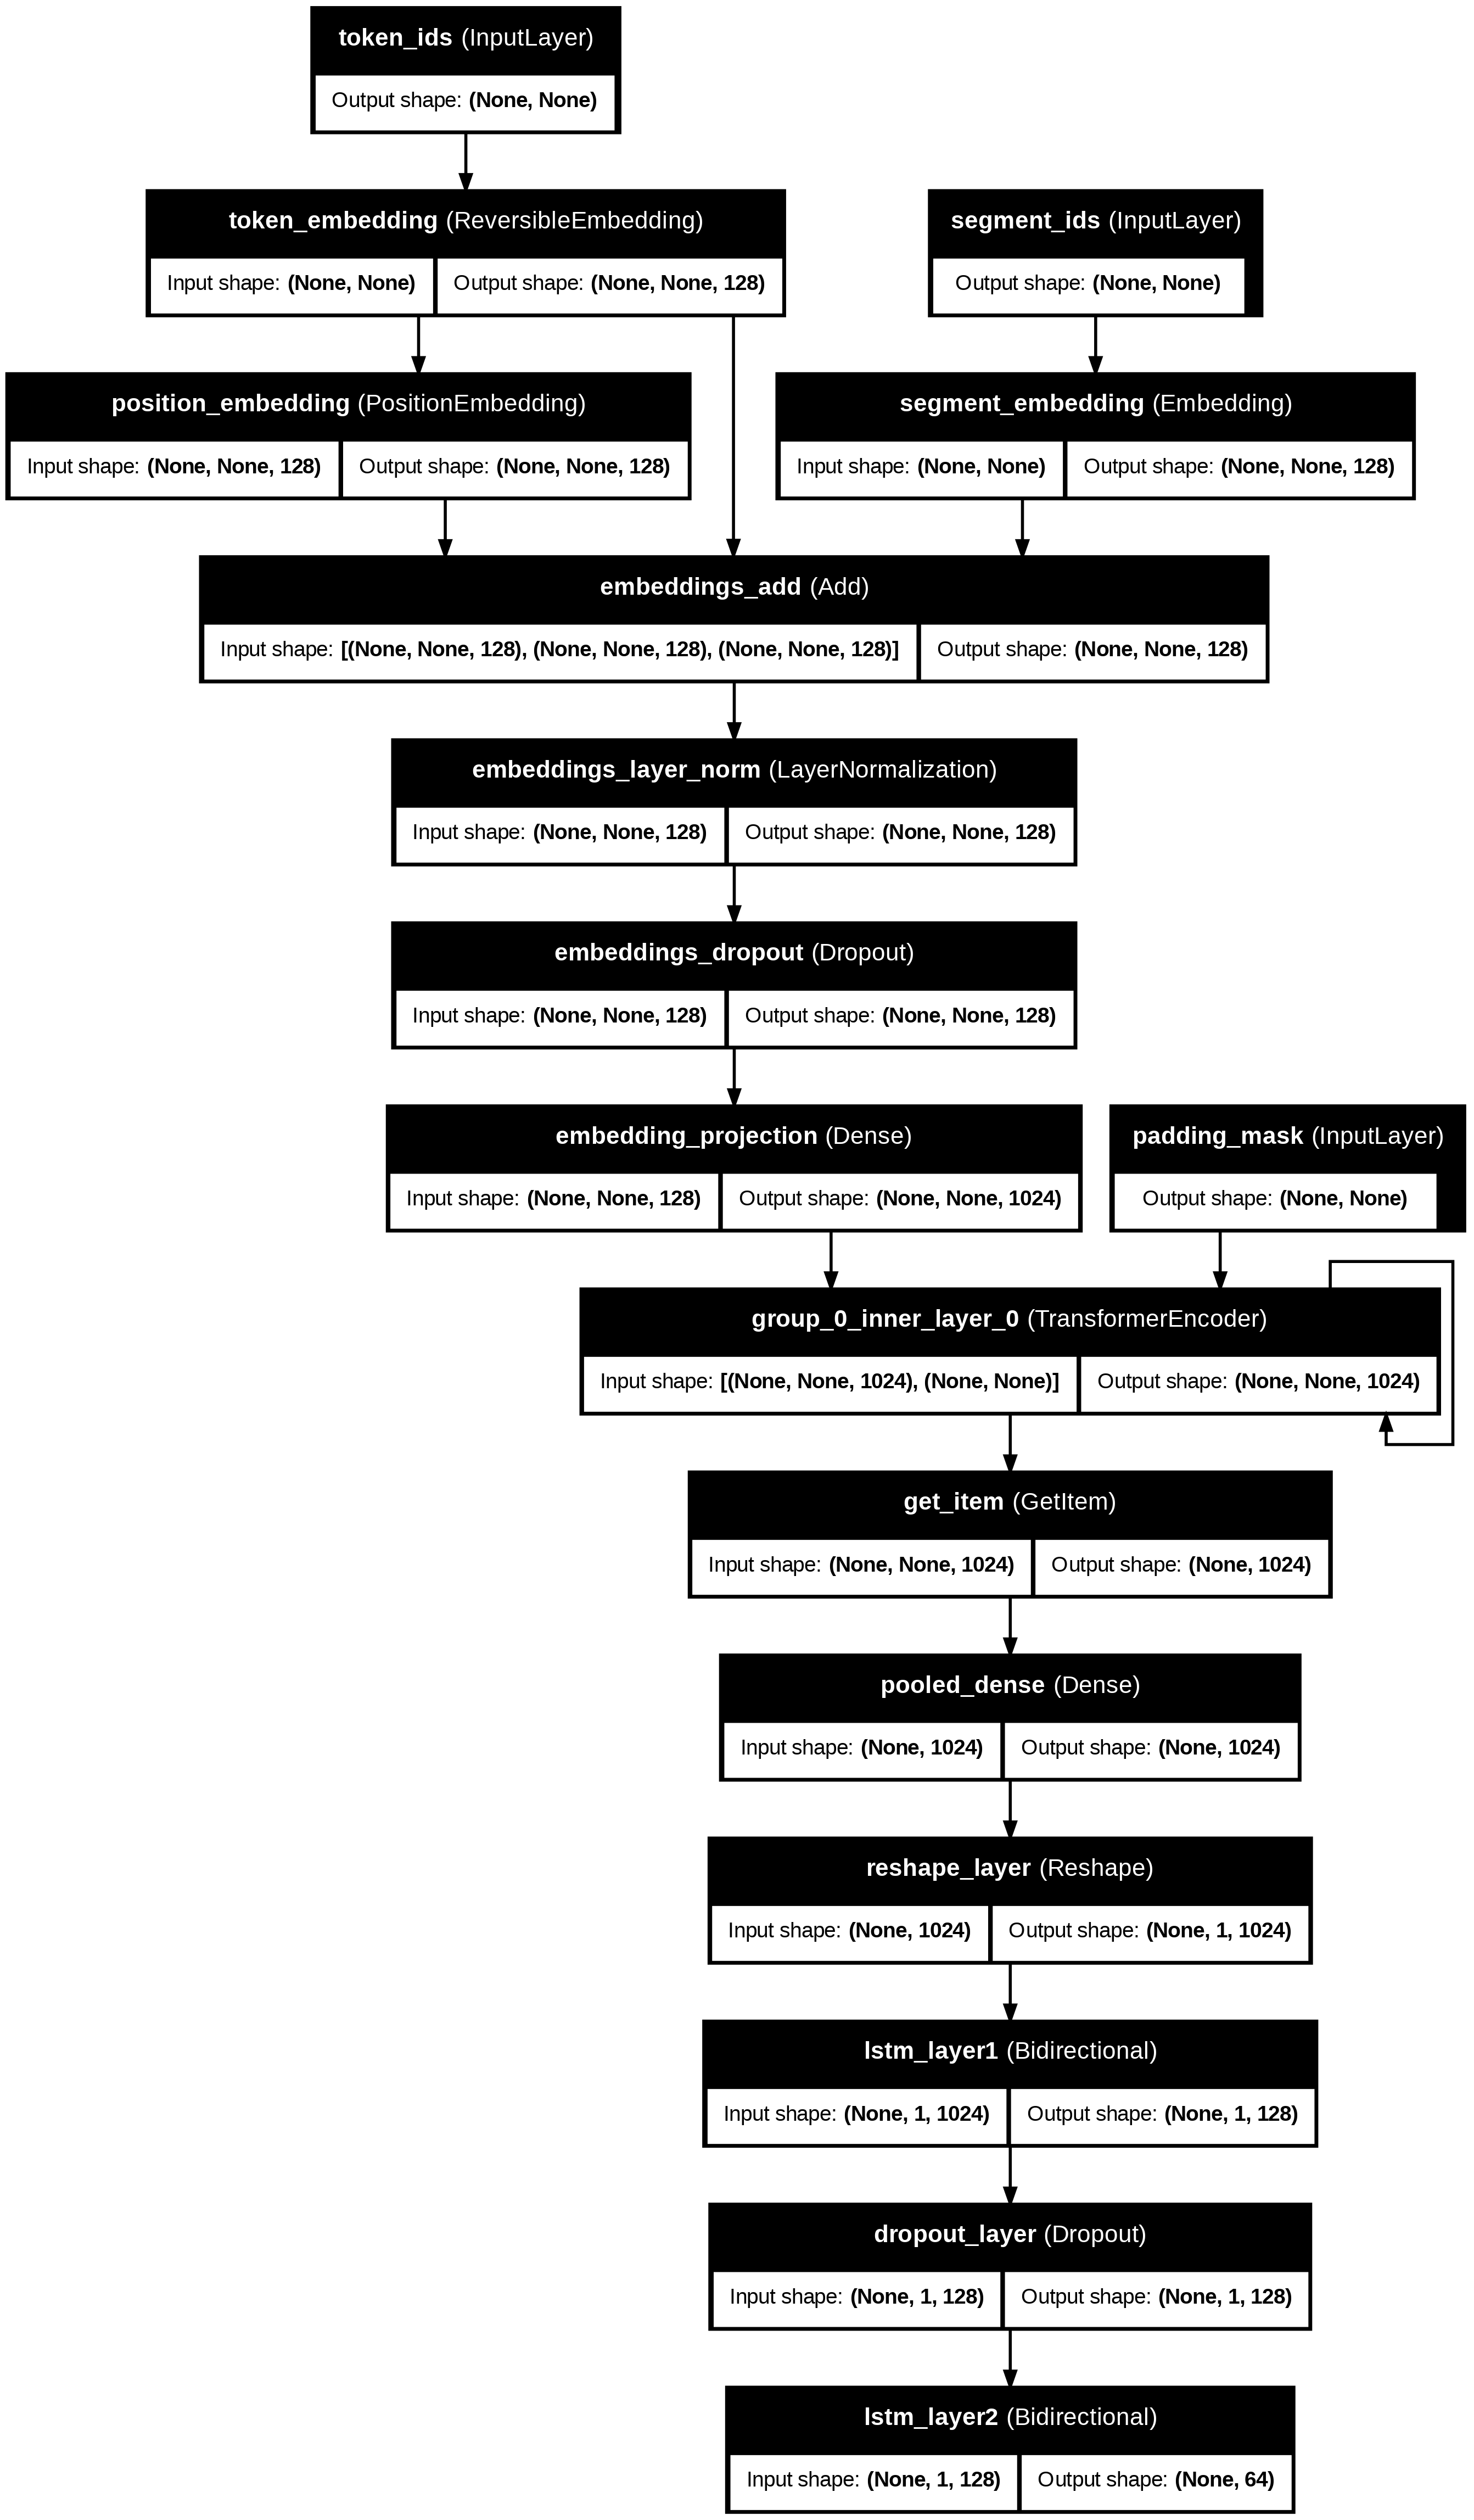

In [34]:
from keras.utils import plot_model
plot_model(model_txt, show_shapes=True, show_layer_names=True)

In [38]:
vgg11_preprocessor = keras_nlp.models.ImageClassifierPreprocessor.from_preset(
    "vgg_11_imagenet",
)
vgg11 = keras_nlp.models.ImageClassifier.from_preset(
    "vgg_11_imagenet",
    preprocessor=vgg11_preprocessor,
    image_shape = (224, 224, 3),
    num_classes=2
)
for layer in vgg11.backbone.layers:
    layer.trainable = False
backbone_output = vgg11.backbone.output
x = GlobalAveragePooling2D(name='global_average_pooling2d')(backbone_output)
# Image features
img_features = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4), name="image_features")(x)

model_img = Model(inputs=vgg11.input, outputs=img_features)
model_img.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ image_features (Dense)               │ (None, 64)                  │          32,832 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,253,312 (35.30 MB)

 Trainable params: 32,832 (128.25 KB)

 Non-trainable params: 9,220,480 (35.17 MB)

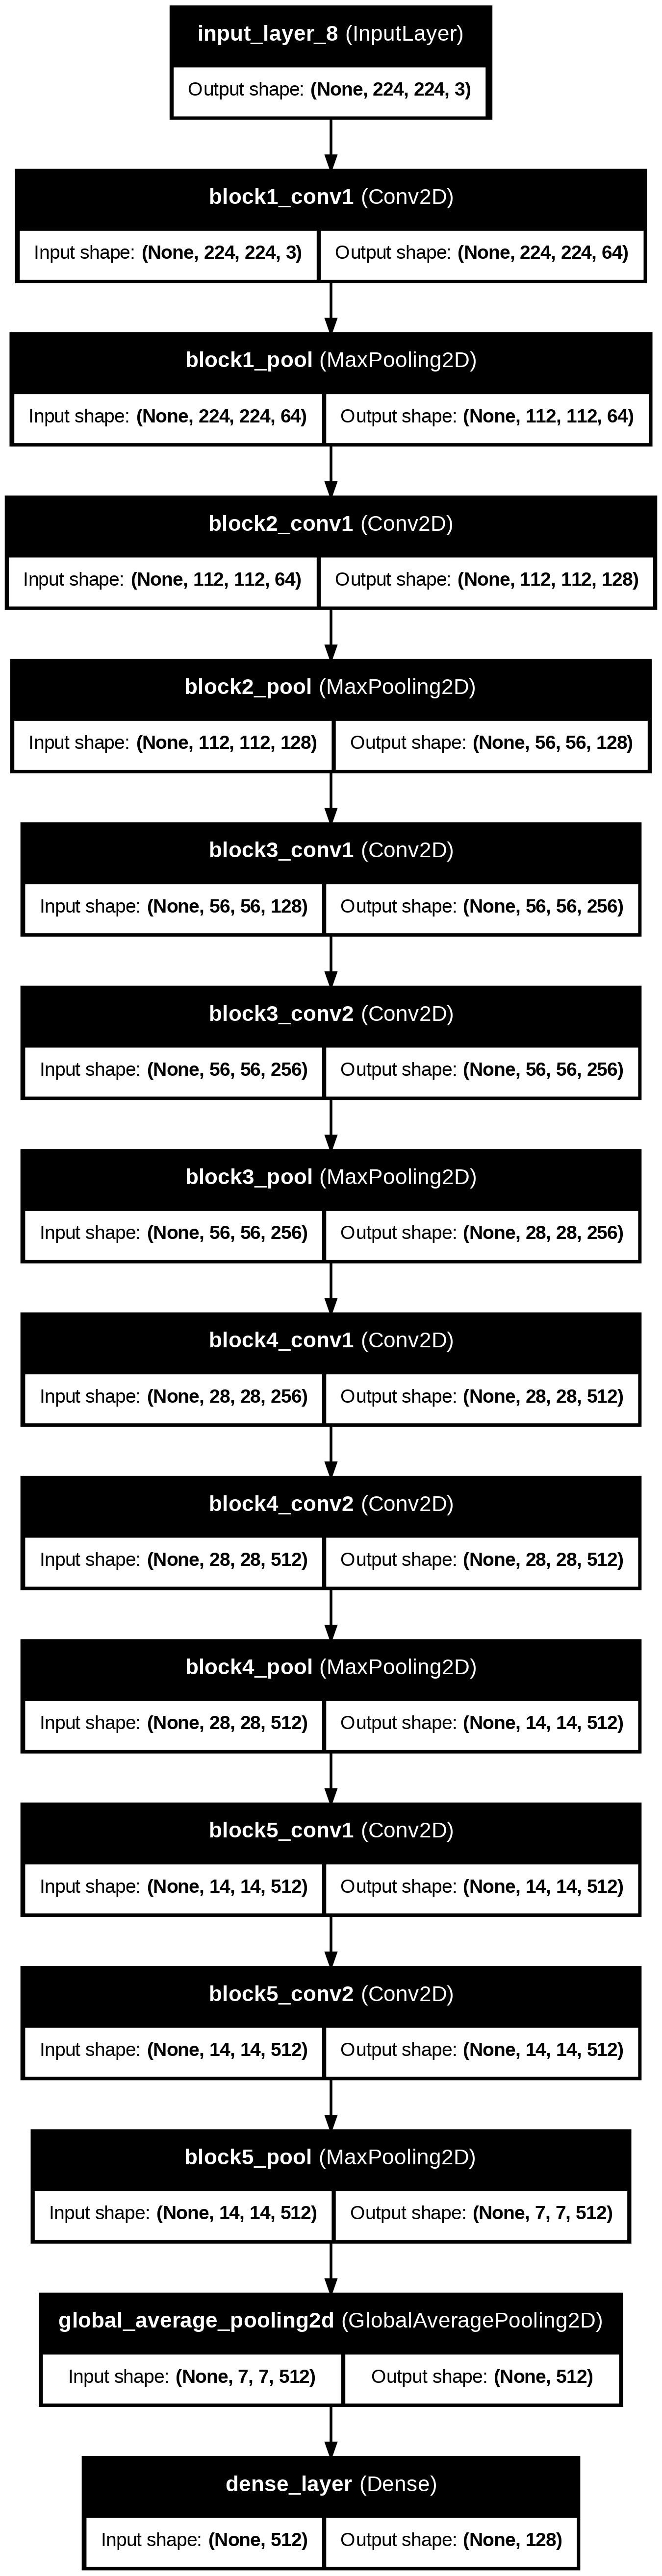

In [45]:
from keras.utils import plot_model
plot_model(model_img, show_shapes=True, show_layer_names=True)

In [39]:
# Input layers
text_input = model_txt.input
img_input = model_img.input
cap_input = model_cap.input
# Concatenate features
combined_features = keras.layers.concatenate([txt_features, img_features, cap_features], name='Concatenated_features')

dropout = Dropout(0.5, name='dropout_layer_end')(combined_features)
pre_pred = Dense(32,activation='relu',kernel_regularizer=regularizers.l2(1e-4), name='dense_layer_end')(dropout)

# Final prediction layer
predictions = Dense(4, activation='sigmoid', name='pred_layer')(pre_pred)

# Final model
model = Model(inputs=[text_input, img_input, cap_input], outputs=predictions)

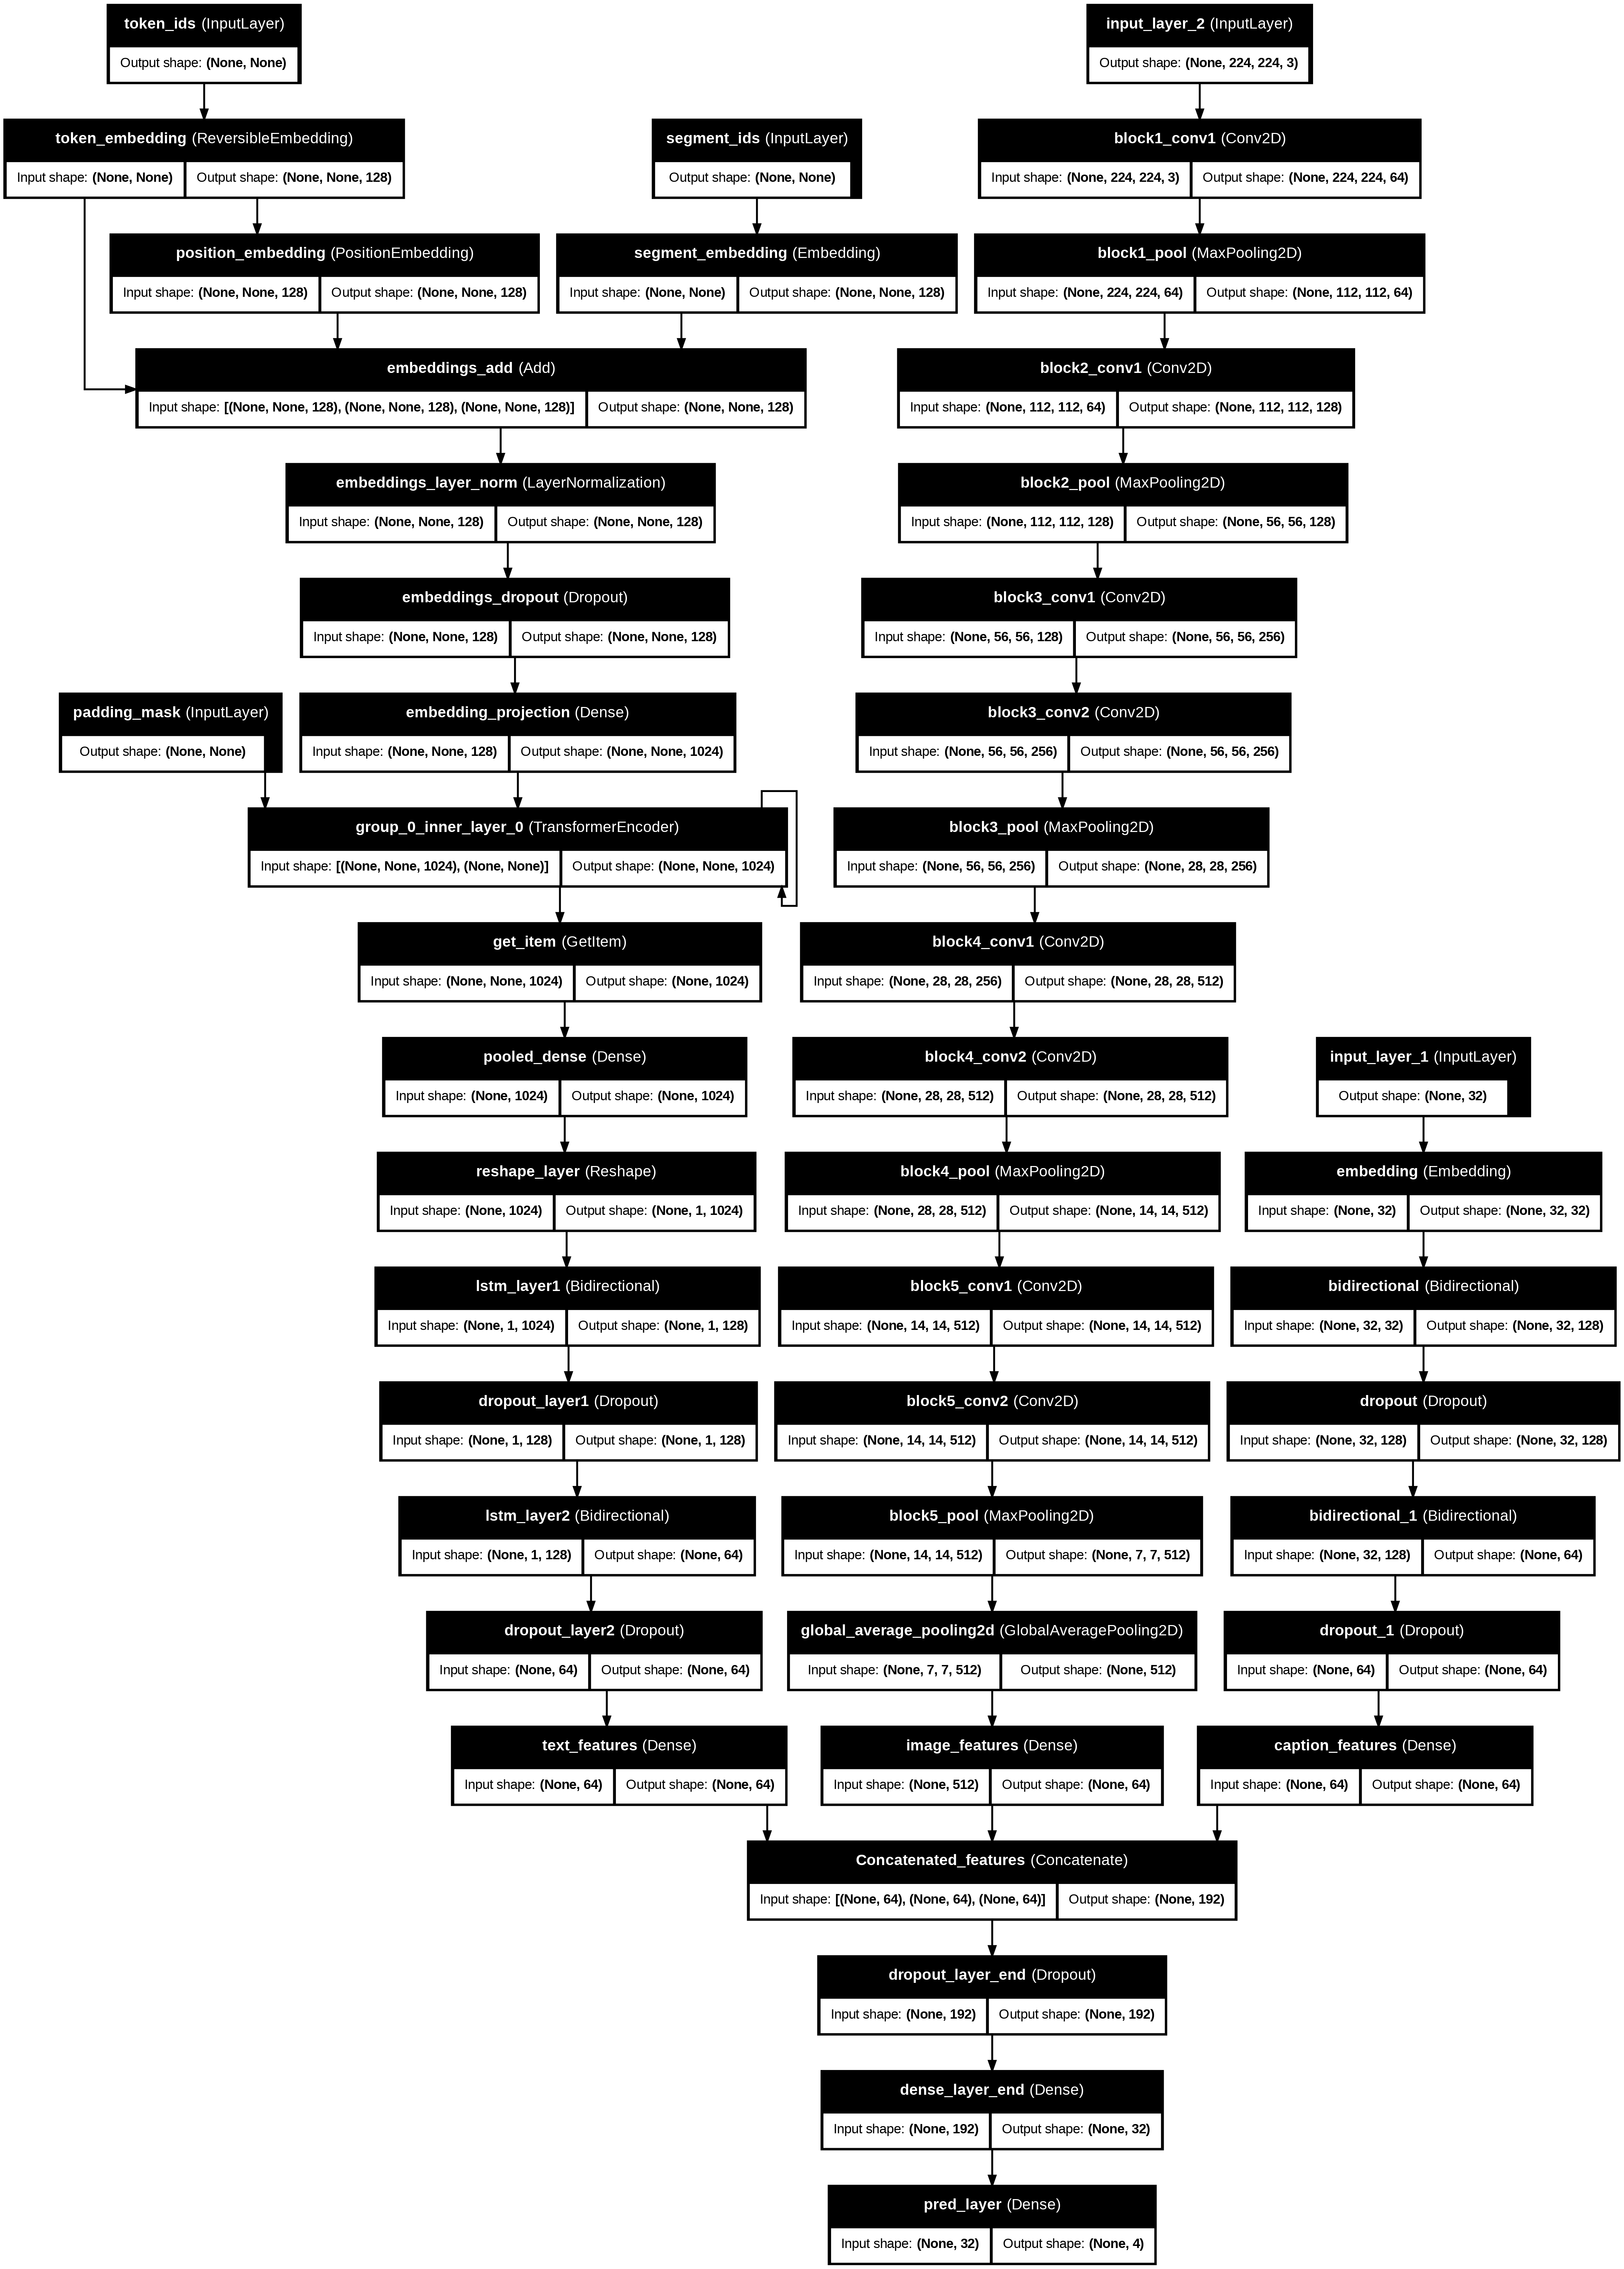

In [40]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [41]:
# Compile the model
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=["binary_accuracy"]
             )

In [42]:
X_train_img = X_train_img.astype('float32')
X_test_img = X_test_img.astype('float32')


In [43]:
print(X_test_img.dtype)# Should be float32 if you're using VGG's preprocessor
print(X_train_img.dtype)

float32
float32


In [44]:
# Train the combined model
model.fit(
    x=[albert_preprocessor(X_train_txt), vgg11_preprocessor(X_train_img), preprocess_texts(train_cap)],
    y=Y_train,                      
    epochs=20,                      
    batch_size=8,
    shuffle=True,
    validation_data=([albert_preprocessor(X_test_txt), vgg11_preprocessor(X_test_img), preprocess_texts(test_cap)], Y_test)
)

Epoch 1/20


I0000 00:00:1745055552.089398     123 cuda_dnn.cc:529] Loaded cuDNN version 90300


874/874 ━━━━━━━━━━━━━━━━━━━━ 144s 122ms/step - binary_accuracy: 0.6827 - loss: 0.6461 - val_binary_accuracy: 0.7083 - val_loss: 0.6088
Epoch 2/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 101s 115ms/step - binary_accuracy: 0.6996 - loss: 0.6176 - val_binary_accuracy: 0.7083 - val_loss: 0.6031
Epoch 3/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 101s 116ms/step - binary_accuracy: 0.7001 - loss: 0.6120 - val_binary_accuracy: 0.7083 - val_loss: 0.6003
Epoch 4/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 101s 116ms/step - binary_accuracy: 0.7051 - loss: 0.6027 - val_binary_accuracy: 0.7083 - val_loss: 0.6039
Epoch 5/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 101s 116ms/step - binary_accuracy: 0.7019 - loss: 0.6056 - val_binary_accuracy: 0.7083 - val_loss: 0.5952
Epoch 6/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 101s 116ms/step - binary_accuracy: 0.7044 - loss: 0.6007 - val_binary_accuracy: 0.7083 - val_loss: 0.5944
Epoch 7/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 101s 116ms/step - binary_accuracy: 0.7017 - loss: 0.6006 - val_binary_accuracy: 0.7083 - val_lo

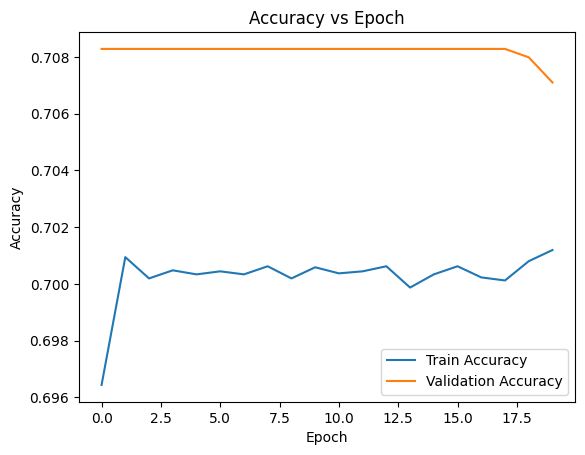

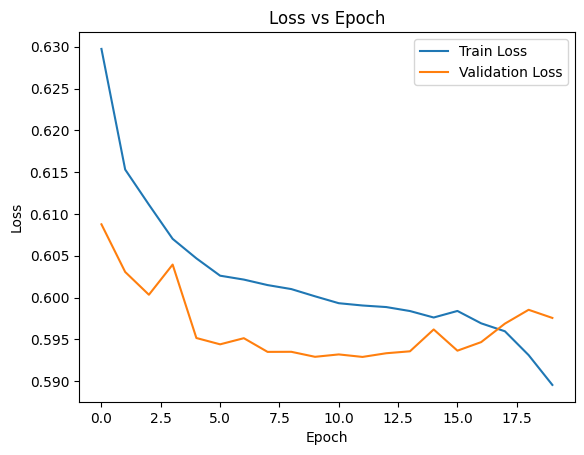

In [45]:
# Plot accuracy vs epoch
plt.plot(model.history.history['binary_accuracy'], label='Train Accuracy')
plt.plot(model.history.history['val_binary_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss vs epoch
plt.plot(model.history.history['loss'], label='Train Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [55]:
predictions = model.predict([albert_preprocessor(X_test_txt), vgg11_preprocessor(X_test_img), preprocess_texts(test_cap)])

27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 263ms/step


In [56]:
# Threshold value for considering a class as present
threshold = 0.5

# Convert predicted probabilities to binary array
predicted = (predictions > threshold).astype(int)

In [57]:
accuracy_arr = []
f1_arr = []
precision_arr = []
recall_arr = []
Y_val = Y_test

In [58]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Evaluate accuracy
humour_accuracy = accuracy_score(Y_val[:,0], predicted[:,0])

# Calculate F1 score
humour_f1 = f1_score(Y_val[:,0], predicted[:,0], average='weighted')

# Calculate precision
humour_precision = precision_score(Y_val[:,0], predicted[:,0], average='weighted')

# Calculate recall
humour_recall = recall_score(Y_val[:,0], predicted[:,0], average='weighted')

accuracy_arr.append(humour_accuracy)
f1_arr.append(humour_f1)
precision_arr.append(humour_precision)
recall_arr.append(humour_recall)

print("Score of Humour Detection")
print("Accuracy:", humour_accuracy)
print("F1 Score:", humour_f1)
print("Precision:", humour_precision)
print("Recall:", humour_recall)

Score of Humour Detection
Accuracy: 0.7846153846153846
F1 Score: 0.6899204244031831
Precision: 0.615621301775148
Recall: 0.7846153846153846


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
# Evaluate accuracy
sarcasm_accuracy = accuracy_score(Y_val[:,1], predicted[:,1])

# Calculate F1 score
sarcasm_f1 = f1_score(Y_val[:,1], predicted[:,1], average='weighted')

# Calculate precision
sarcasm_precision = precision_score(Y_val[:,1], predicted[:,1], average='weighted')

# Calculate recall
sarcasm_recall = recall_score(Y_val[:,1], predicted[:,1], average='weighted')

accuracy_arr.append(sarcasm_accuracy)
f1_arr.append(sarcasm_f1)
precision_arr.append(sarcasm_precision)
recall_arr.append(sarcasm_recall)

print("Score of Sarcasm Detection")
print("Accuracy:", sarcasm_accuracy)
print("F1 Score:", sarcasm_f1)
print("Precision:", sarcasm_precision)
print("Recall:", sarcasm_recall)

Score of Sarcasm Detection
Accuracy: 0.7881656804733728
F1 Score: 0.6947959539315239
Precision: 0.6212051398760547
Recall: 0.7881656804733728


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
# Evaluate accuracy
offensive_accuracy = accuracy_score(Y_val[:,2], predicted[:,2])

# Calculate F1 score
offensive_f1 = f1_score(Y_val[:,2], predicted[:,2], average='weighted')

# Calculate precision
offensive_precision = precision_score(Y_val[:,2], predicted[:,2], average='weighted')

# Calculate recall
offensive_recall = recall_score(Y_val[:,2], predicted[:,2], average='weighted')

accuracy_arr.append(offensive_accuracy)
f1_arr.append(offensive_f1)
precision_arr.append(offensive_precision)
recall_arr.append(offensive_recall)

print("Score of Offensive Detection")
print("Accuracy:", offensive_accuracy)
print("F1 Score:", offensive_f1)
print("Precision:", offensive_precision)
print("Recall:", offensive_recall)

Score of Offensive Detection
Accuracy: 0.6319526627218935
F1 Score: 0.4933929820094461
Precision: 0.4934323748144292
Recall: 0.6319526627218935


In [61]:
# Evaluate accuracy
motivation_accuracy = accuracy_score(Y_val[:,3], predicted[:,3])

# Calculate F1 score
motivation_f1 = f1_score(Y_val[:,3], predicted[:,3], average='weighted')

# Calculate precision
motivation_precision = precision_score(Y_val[:,3], predicted[:,3], average='weighted')

# Calculate recall
motivation_recall = recall_score(Y_val[:,3], predicted[:,3], average='weighted')

accuracy_arr.append(motivation_accuracy)
f1_arr.append(motivation_f1)
precision_arr.append(motivation_precision)
recall_arr.append(motivation_recall)

print("Score of Motivation Detection")
print("Accuracy:", motivation_accuracy)
print("F1 Score:", motivation_f1)
print("Precision:", motivation_precision)
print("Recall:", motivation_recall)

Score of Motivation Detection
Accuracy: 0.6260355029585799
F1 Score: 0.48205644987640284
Precision: 0.3919204509646021
Recall: 0.6260355029585799


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
accuracy_arr = np.array(accuracy_arr)
f1_arr = np.array(f1_arr)
precision_arr = np.array(precision_arr)
recall_arr = np.array(recall_arr)
print("Average scores :")
print("Avg accuracy:",np.mean(accuracy_arr))
print("Avg f1 score:",np.mean(f1_arr))
print("Avg precision",np.mean(precision_arr))
print("Avg recall:",np.mean(recall_arr))

Average scores :
Avg accuracy: 0.7076923076923077
Avg f1 score: 0.590041452555139
Avg precision 0.5305448168575585
Avg recall: 0.7076923076923077


In [63]:
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix, roc_curve, auc
import seaborn as sns

In [64]:
conf_matrices = multilabel_confusion_matrix(Y_test, predicted)

# Print for each label
labels = ['humour', 'sarcasm', 'offensive', 'motivational']
for i, cm in enumerate(conf_matrices):
    print(f"\nConfusion Matrix for {labels[i]}:")
    print(cm)


Confusion Matrix for humour:
[[  0 182]
 [  0 663]]

Confusion Matrix for sarcasm:
[[  0 179]
 [  0 666]]

Confusion Matrix for offensive:
[[  1 308]
 [  3 533]]

Confusion Matrix for motivational:
[[529   0]
 [316   0]]


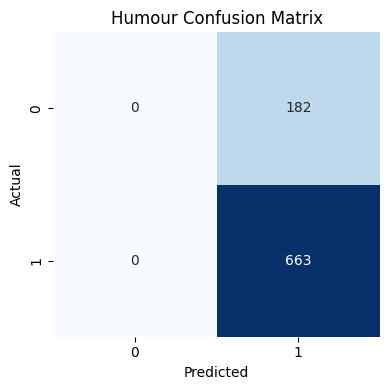

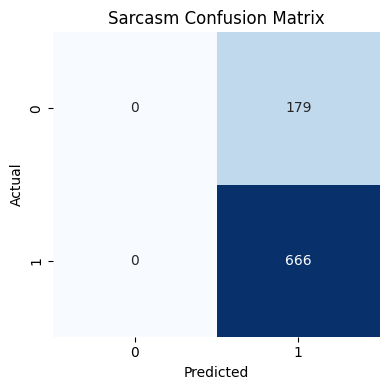

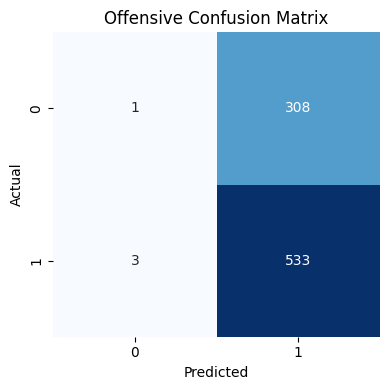

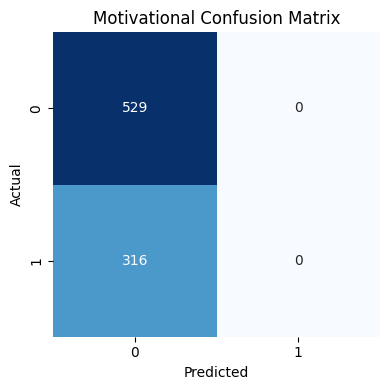

In [65]:
labels = ['humour', 'sarcasm', 'offensive', 'motivational']

# Show each matrix one by one
for i, label in enumerate(labels):
    cm = conf_matrices[i]

    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{label.capitalize()} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks([0.5, 1.5], ['0', '1'])
    plt.yticks([0.5, 1.5], ['0', '1'])
    plt.tight_layout()
    cf_path = f"/kaggle/working/confusion_matrix_pre_fine_tune_memotion_{i}.png"
    plt.savefig(cf_path, dpi=300)
    plt.show()

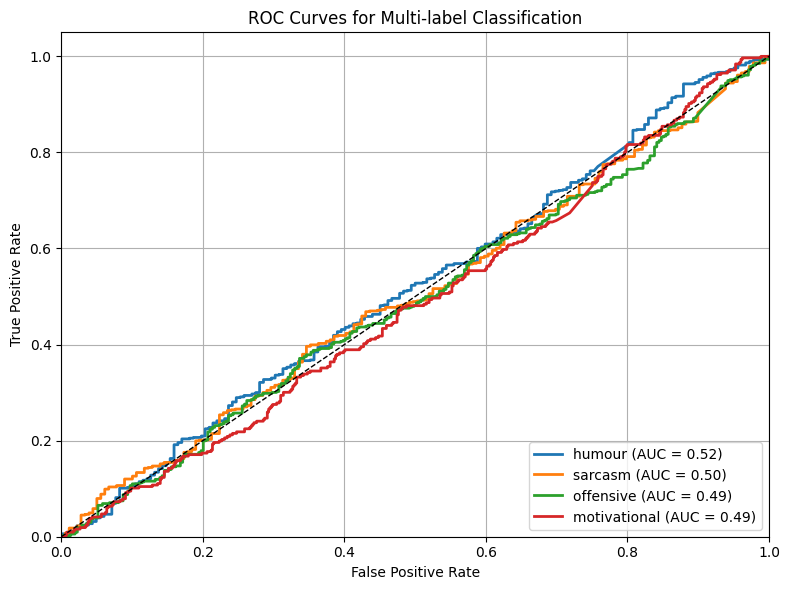

In [66]:
class_names = ['humour', 'sarcasm', 'offensive', 'motivational']

# Plot ROC for each label
plt.figure(figsize=(8, 6))
for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(Y_test[:, i], predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', lw=1)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-label Classification')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
roc_path = "/kaggle/working/roc_curve_pre_fine_tune_memotion.png"
plt.savefig(roc_path, dpi=300)
plt.show()

In [67]:
# Fine tuning 
albert.backbone.trainable = True
for layer in vgg11.backbone.layers:
    layer.trainable = True

In [68]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ token_ids (InputLayer)    │ (None, None)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ token_embedding           │ (None, None, 128)      │      3,840,000 │ token_ids[0][0]        │
│ (ReversibleEmbedding)     │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ segment_ids (InputLayer)  │ (None, None)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ position_embedding        │ (None, None, 128)      │         65,536 │ token_embedding[0][0]  │
│ (PositionEmbedding)       │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ segment_embedding         │ (None, None, 128)      │            256 │ segment_ids[0][0]      │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embeddings_add (Add)      │ (None, None, 128)      │              0 │ token_embedding[0][0], │
│                           │                        │                │ position_embedding[0]… │
│                           │                        │                │ segment_embedding[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embeddings_layer_norm     │ (None, None, 128)      │            256 │ embeddings_add[0][0]   │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embeddings_dropout        │ (None, None, 128)      │              0 │ embeddings_layer_norm… │
│ (Dropout)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_projection      │ (None, None, 1024)     │        132,096 │ embeddings_dropout[0]… │
│ (Dense)                   │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ padding_mask (InputLayer) │ (None, None)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ group_0_inner_layer_0     │ (None, None, 1024)     │     12,596,224 │ embedding_projection[… │
│ (TransformerEncoder)      │                        │                │ padding_mask[0][0],    │
│                           │                        │                │ group_0_inner_layer_0… │
│                           │                        │                │ padding_mask[0][0],    │
│                           │                        │                │ group_0_inner_layer_0… │
│                           │                        │                │ padding_mask[0][0],    │
│                           │                        │                │ group_0_inner_layer_0… │
│                           │                        │                │ padding_mask[0][0],    │
│                           │                        │                │ group_0_inner_layer_0… │
│                           │                        │                │ padding_mask[0][0],    │
│                      

 Total params: 30,075,822 (114.73 MB)

 Trainable params: 27,961,572 (106.66 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,114,250 (8.07 MB)

In [83]:
model.fit(
    x=[albert_preprocessor(X_train_txt), vgg11_preprocessor(X_train_img), preprocess_texts(train_cap)],
    y=Y_train,                      
    epochs=20,                      
    batch_size=8,
    shuffle=True,
    validation_data=([albert_preprocessor(X_test_txt), vgg11_preprocessor(X_test_img), preprocess_texts(test_cap)], Y_test)
)

Epoch 1/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 102s 116ms/step - binary_accuracy: 0.7110 - loss: 0.5776 - val_binary_accuracy: 0.6864 - val_loss: 0.6227
Epoch 2/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 101s 115ms/step - binary_accuracy: 0.7182 - loss: 0.5649 - val_binary_accuracy: 0.6962 - val_loss: 0.6290
Epoch 3/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 100s 115ms/step - binary_accuracy: 0.7238 - loss: 0.5552 - val_binary_accuracy: 0.6852 - val_loss: 0.6699
Epoch 4/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 101s 115ms/step - binary_accuracy: 0.7214 - loss: 0.5560 - val_binary_accuracy: 0.6802 - val_loss: 0.6557
Epoch 5/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 101s 115ms/step - binary_accuracy: 0.7274 - loss: 0.5466 - val_binary_accuracy: 0.6825 - val_loss: 0.6634
Epoch 6/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 101s 115ms/step - binary_accuracy: 0.7254 - loss: 0.5425 - val_binary_accuracy: 0.6814 - val_loss: 0.6782
Epoch 7/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 101s 115ms/step - binary_accuracy: 0.7249 - loss: 0.5385 - val_binary_accuracy: 0.69

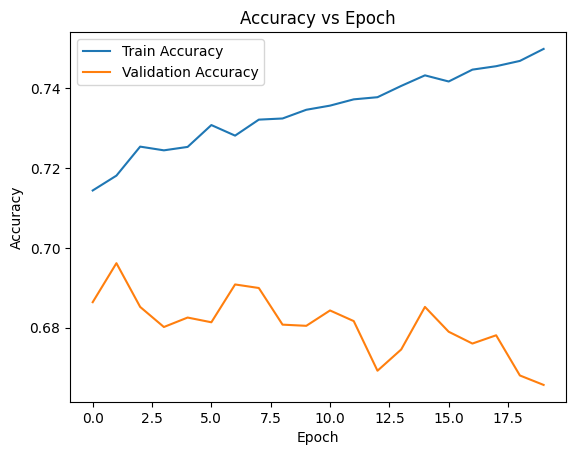

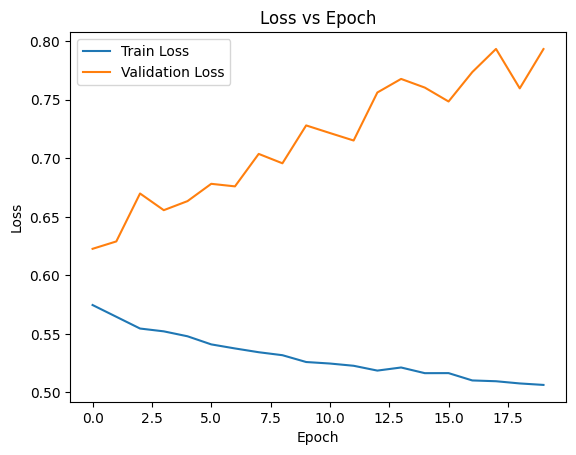

In [84]:
# Plot accuracy vs epoch
plt.plot(model.history.history['binary_accuracy'], label='Train Accuracy')
plt.plot(model.history.history['val_binary_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss vs epoch
plt.plot(model.history.history['loss'], label='Train Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [85]:
predictions = model.predict([albert_preprocessor(X_test_txt), vgg11_preprocessor(X_test_img), preprocess_texts(test_cap)])

27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 263ms/step


In [86]:
# Threshold value for considering a class as present
threshold = 0.5

# Convert predicted probabilities to binary array
predicted = (predictions > threshold).astype(int)

In [87]:
accuracy_arr = []
f1_arr = []
precision_arr = []
recall_arr = []
Y_val = Y_test

In [88]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Evaluate accuracy
humour_accuracy = accuracy_score(Y_val[:,0], predicted[:,0])

# Calculate F1 score
humour_f1 = f1_score(Y_val[:,0], predicted[:,0], average='weighted')

# Calculate precision
humour_precision = precision_score(Y_val[:,0], predicted[:,0], average='weighted')

# Calculate recall
humour_recall = recall_score(Y_val[:,0], predicted[:,0], average='weighted')

accuracy_arr.append(humour_accuracy)
f1_arr.append(humour_f1)
precision_arr.append(humour_precision)
recall_arr.append(humour_recall)

print("Score of Humour Detection")
print("Accuracy:", humour_accuracy)
print("F1 Score:", humour_f1)
print("Precision:", humour_precision)
print("Recall:", humour_recall)

Score of Humour Detection
Accuracy: 0.7857988165680473
F1 Score: 0.6970381737553277
Precision: 0.7466483516483517
Recall: 0.7857988165680473


In [89]:
# Evaluate accuracy
sarcasm_accuracy = accuracy_score(Y_val[:,1], predicted[:,1])

# Calculate F1 score
sarcasm_f1 = f1_score(Y_val[:,1], predicted[:,1], average='weighted')

# Calculate precision
sarcasm_precision = precision_score(Y_val[:,1], predicted[:,1], average='weighted')

# Calculate recall
sarcasm_recall = recall_score(Y_val[:,1], predicted[:,1], average='weighted')

accuracy_arr.append(sarcasm_accuracy)
f1_arr.append(sarcasm_f1)
precision_arr.append(sarcasm_precision)
recall_arr.append(sarcasm_recall)

print("Score of Sarcasm Detection")
print("Accuracy:", sarcasm_accuracy)
print("F1 Score:", sarcasm_f1)
print("Precision:", sarcasm_precision)
print("Recall:", sarcasm_recall)

Score of Sarcasm Detection
Accuracy: 0.7810650887573964
F1 Score: 0.7052747336506328
Precision: 0.6979870898332436
Recall: 0.7810650887573964


In [90]:
# Evaluate accuracy
offensive_accuracy = accuracy_score(Y_val[:,2], predicted[:,2])

# Calculate F1 score
offensive_f1 = f1_score(Y_val[:,2], predicted[:,2], average='weighted')

# Calculate precision
offensive_precision = precision_score(Y_val[:,2], predicted[:,2], average='weighted')

# Calculate recall
offensive_recall = recall_score(Y_val[:,2], predicted[:,2], average='weighted')

accuracy_arr.append(offensive_accuracy)
f1_arr.append(offensive_f1)
precision_arr.append(offensive_precision)
recall_arr.append(offensive_recall)

print("Score of Offensive Detection")
print("Accuracy:", offensive_accuracy)
print("F1 Score:", offensive_f1)
print("Precision:", offensive_precision)
print("Recall:", offensive_recall)

Score of Offensive Detection
Accuracy: 0.5467455621301776
F1 Score: 0.5419597640351376
Precision: 0.5382114886505963
Recall: 0.5467455621301776


In [91]:
# Evaluate accuracy
motivation_accuracy = accuracy_score(Y_val[:,3], predicted[:,3])

# Calculate F1 score
motivation_f1 = f1_score(Y_val[:,3], predicted[:,3], average='weighted')

# Calculate precision
motivation_precision = precision_score(Y_val[:,3], predicted[:,3], average='weighted')

# Calculate recall
motivation_recall = recall_score(Y_val[:,3], predicted[:,3], average='weighted')

accuracy_arr.append(motivation_accuracy)
f1_arr.append(motivation_f1)
precision_arr.append(motivation_precision)
recall_arr.append(motivation_recall)

print("Score of Motivation Detection")
print("Accuracy:", motivation_accuracy)
print("F1 Score:", motivation_f1)
print("Precision:", motivation_precision)
print("Recall:", motivation_recall)

Score of Motivation Detection
Accuracy: 0.6189349112426036
F1 Score: 0.5072472140944029
Precision: 0.5489285966798566
Recall: 0.6189349112426036


In [92]:
accuracy_arr = np.array(accuracy_arr)
f1_arr = np.array(f1_arr)
precision_arr = np.array(precision_arr)
recall_arr = np.array(recall_arr)
print("Average scores :")
print("Avg accuracy:",np.mean(accuracy_arr))
print("Avg f1 score:",np.mean(f1_arr))
print("Avg precision",np.mean(precision_arr))
print("Avg recall:",np.mean(recall_arr))

Average scores :
Avg accuracy: 0.6831360946745562
Avg f1 score: 0.6128799713838753
Avg precision 0.6329438817030121
Avg recall: 0.6831360946745562


In [93]:
conf_matrices = multilabel_confusion_matrix(Y_test, predicted)

# Print for each label
labels = ['humour', 'sarcasm', 'offensive', 'motivational']
for i, cm in enumerate(conf_matrices):
    print(f"\nConfusion Matrix for {labels[i]}:")
    print(cm)


Confusion Matrix for humour:
[[  3 179]
 [  2 661]]

Confusion Matrix for sarcasm:
[[  7 172]
 [ 13 653]]

Confusion Matrix for offensive:
[[104 205]
 [178 358]]

Confusion Matrix for motivational:
[[508  21]
 [301  15]]


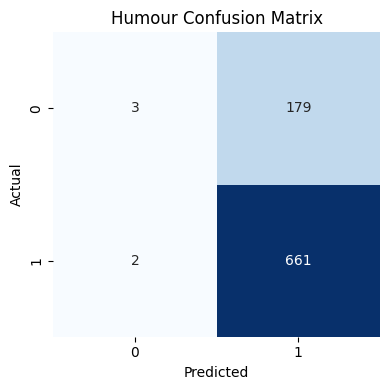

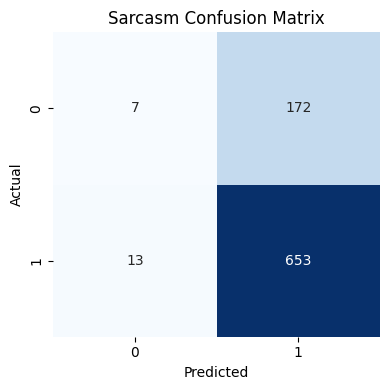

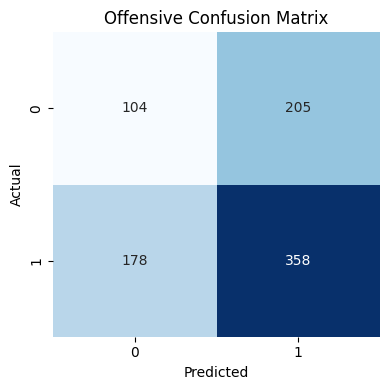

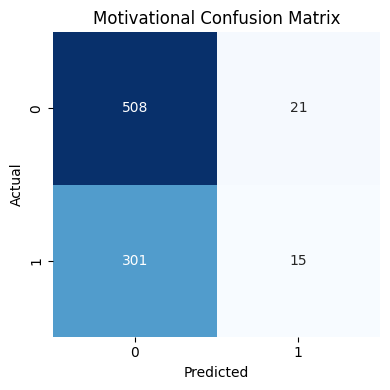

In [94]:
labels = ['humour', 'sarcasm', 'offensive', 'motivational']

# Show each matrix one by one
for i, label in enumerate(labels):
    cm = conf_matrices[i]

    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{label.capitalize()} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks([0.5, 1.5], ['0', '1'])
    plt.yticks([0.5, 1.5], ['0', '1'])
    plt.tight_layout()
    cf_path = f"/kaggle/working/confusion_matrix_post_fine_tune_memotion_{labels[i]}.png"
    plt.savefig(cf_path, dpi=300)
    plt.show()

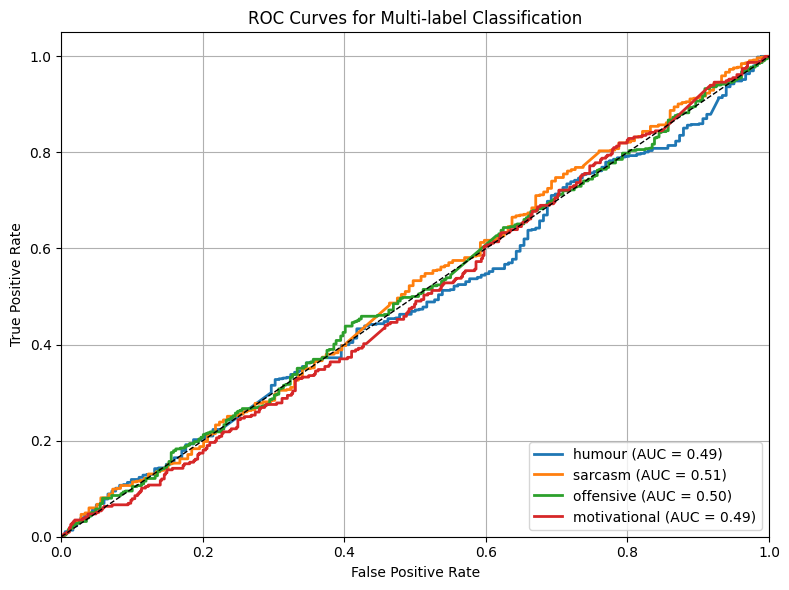

In [97]:
class_names = ['humour', 'sarcasm', 'offensive', 'motivational']

# Plot ROC for each label
plt.figure(figsize=(8, 6))
for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(Y_test[:, i], predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', lw=1)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-label Classification')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
roc_path = "/kaggle/working/roc_curve_post_fine_tune_memotion_2.png"
plt.savefig(roc_path, dpi=300)
plt.show()